# Data Analysis

In [3]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned exported dataset csv
fact_df = pd.read_csv("X:/00 Portfolio Projects/Google Ads Analysis/fact_campaign_performance_cleaned.csv")
fact_df.head()

,date,campaign_id,ad_id,keyword_id,region_id,customer_id,impressions,clicks,conversions,cost,revenue,ctr,cvr,cpc,revenue_per_conversion,roi
0,2025-06-22,12,25,27,7,551,543.0,543.0,456.0,238.12,447.76,1.000000,0.839779,0.438527,0.981930,0.880396
1,2025-01-20,5,2,20,2,960,578.0,578.0,347.0,52.04,992.12,1.000000,0.600346,0.090035,2.859135,18.064566
2,2025-01-17,14,41,14,8,401,3741.0,1006.0,224.0,436.68,926.67,0.268912,0.222664,0.434076,4.136920,1.122080
3,2025-04-29,6,13,2,9,214,896.0,600.0,358.0,322.24,593.79,0.669643,0.596667,0.537067,1.658631,0.842695
4,2025-03-12,1,18,19,6,209,3345.0,840.0,394.0,193.34,479.93,0.251121,0.469048,0.230167,1.218096,1.482311


In [7]:
# Overview of the data
print("\n--- Data Info ---")
print(fact_df.info())

print("\n--- Summary Stats ---")
print(fact_df.describe().T)

print("\n--- Nulls Check ---")
print(fact_df.isnull().sum())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    50000 non-null  object 
 1   campaign_id             50000 non-null  int64  
 2   ad_id                   50000 non-null  int64  
 3   keyword_id              50000 non-null  int64  
 4   region_id               50000 non-null  int64  
 5   customer_id             50000 non-null  int64  
 6   impressions             50000 non-null  float64
 7   clicks                  50000 non-null  float64
 8   conversions             50000 non-null  float64
 9   cost                    50000 non-null  float64
 10  revenue                 50000 non-null  float64
 11  ctr                     49986 non-null  float64
 12  cvr                     49958 non-null  float64
 13  cpc                     49958 non-null  float64
 14  revenue_per_convers

In [8]:
# Sanity check for key metrics
# CTR = clicks / impressions
fact_df["ctr_check"] = fact_df["clicks"] / fact_df["impressions"].replace(0, pd.NA)

# CVR = conversions / clicks
fact_df["cvr_check"] = fact_df["conversions"] / fact_df["clicks"].replace(0, pd.NA)

# CPC = cost / clicks
fact_df["cpc_check"] = fact_df["cost"] / fact_df["clicks"].replace(0, pd.NA)

# ROI = (revenue - cost) / cost
fact_df["roi_check"] = (fact_df["revenue"] - fact_df["cost"]) / fact_df["cost"].replace(0, pd.NA)

print("\n--- Metric Sanity Check ---")
print(fact_df[["ctr", "ctr_check", "cvr", "cvr_check", "cpc", "cpc_check", "roi", "roi_check"]].head())


--- Metric Sanity Check ---
        ctr ctr_check       cvr cvr_check       cpc cpc_check        roi  \
0  1.000000       1.0  0.839779  0.839779  0.438527  0.438527   0.880396   
1  1.000000       1.0  0.600346  0.600346  0.090035  0.090035  18.064566   
2  0.268912  0.268912  0.222664  0.222664  0.434076  0.434076   1.122080   
3  0.669643  0.669643  0.596667  0.596667  0.537067  0.537067   0.842695   
4  0.251121  0.251121  0.469048  0.469048  0.230167  0.230167   1.482311   

   roi_check  
0   0.880396  
1  18.064566  
2    1.12208  
3   0.842695  
4   1.482311  


In [9]:
# Campaign Level Summary
campaign_summary = fact_df.groupby("campaign_id").agg({
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum",
    "cost": "sum",
    "revenue": "sum"
}).reset_index()

campaign_summary["ctr"] = campaign_summary["clicks"] / campaign_summary["impressions"]
campaign_summary["cvr"] = campaign_summary["conversions"] / campaign_summary["clicks"]
campaign_summary["cpc"] = campaign_summary["cost"] / campaign_summary["clicks"]
campaign_summary["roi"] = (campaign_summary["revenue"] - campaign_summary["cost"]) / campaign_summary["cost"]

print("\n--- Campaign Summary ---")
print(campaign_summary.sort_values("roi", ascending=False).head(10))


--- Campaign Summary ---
    campaign_id  impressions     clicks  conversions       cost      revenue  \
13           14    6061874.0  2107847.0     548025.0  605986.43  1228066.845   
3             4    6311497.0  2137465.0     553648.0  616716.01  1249241.210   
10           11    6021339.0  2119443.0     546083.0  609674.50  1233108.295   
14           15    5952134.0  2065383.0     538289.0  597310.18  1205937.735   
1             2    6370515.0  2263604.0     567211.0  642264.43  1295155.505   
9            10    6222118.0  2176199.0     553666.0  600363.69  1208845.260   
7             8    6236942.0  2143670.0     548852.0  621770.29  1250728.430   
11           12    6347223.0  2192975.0     547035.0  626346.13  1258432.380   
17           18    6191272.0  2136842.0     550933.0  618637.39  1242537.515   
6             7    6303274.0  2184323.0     558962.0  612794.38  1229016.440   

         ctr       cvr       cpc       roi  
13  0.347722  0.259993  0.287491  1.026558  
3  

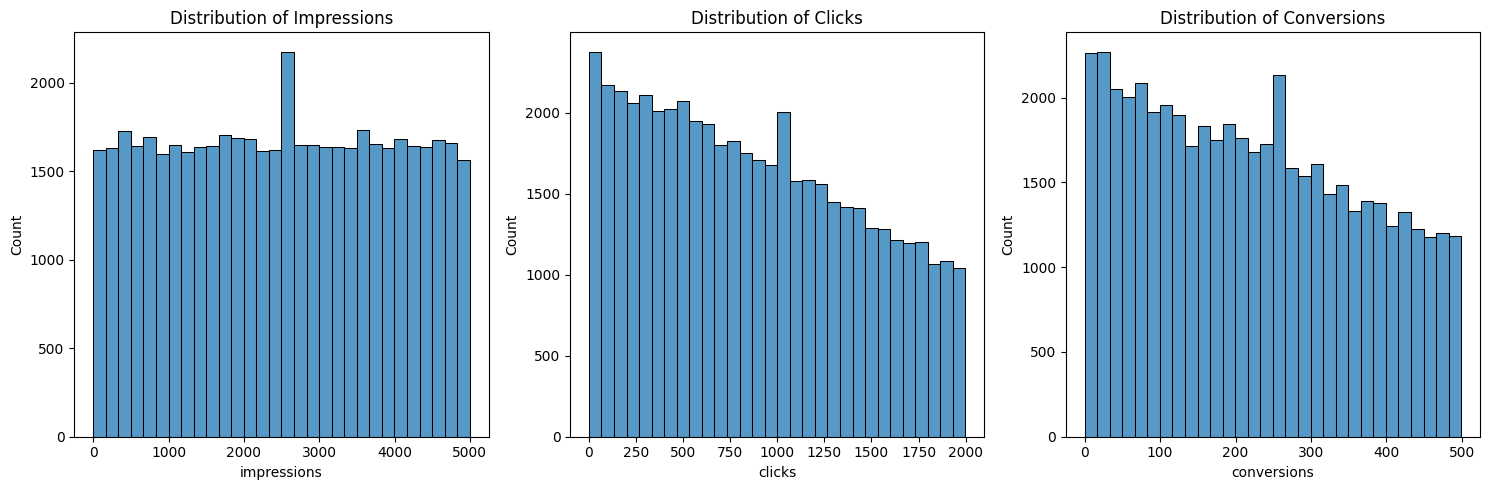

In [10]:
# Distribution of Impressions, Clicks, Conversions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(fact_df["impressions"], bins=30, ax=axes[0])
axes[0].set_title("Distribution of Impressions")

sns.histplot(fact_df["clicks"], bins=30, ax=axes[1])
axes[1].set_title("Distribution of Clicks")

sns.histplot(fact_df["conversions"], bins=30, ax=axes[2])
axes[2].set_title("Distribution of Conversions")

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4724\3165388219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="campaign_id", y="roi", data=top_campaigns, palette="viridis")


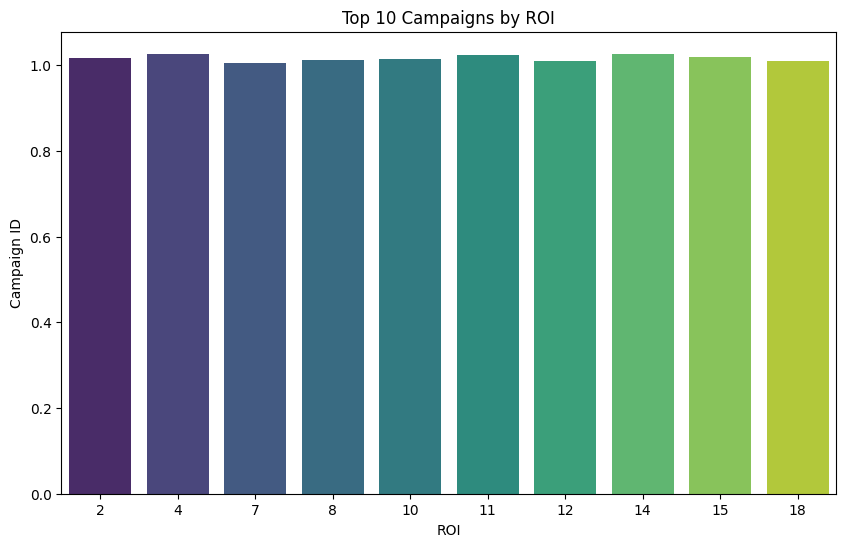

In [12]:
# Top 10 Campaigns by ROI
top_campaigns = campaign_summary.sort_values("roi", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="campaign_id", y="roi", data=top_campaigns, palette="viridis")
plt.title("Top 10 Campaigns by ROI")
plt.xlabel("ROI")
plt.ylabel("Campaign ID")
plt.show()

In [13]:
# Ad-level performance summary
ad_summary = fact_df.groupby("ad_id").agg({
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum",
    "cost": "sum",
    "revenue": "sum"
}).reset_index()

ad_summary["ctr"] = ad_summary["clicks"] / ad_summary["impressions"]
ad_summary["cvr"] = ad_summary["conversions"] / ad_summary["clicks"]
ad_summary["cpc"] = ad_summary["cost"] / ad_summary["clicks"]
ad_summary["roi"] = (ad_summary["revenue"] - ad_summary["cost"]) / ad_summary["cost"]

print("\n--- Top Ads by ROI ---")
print(ad_summary.sort_values("roi", ascending=False).head(10))


--- Top Ads by ROI ---
    ad_id  impressions    clicks  conversions       cost     revenue  \
36     37    2477755.0  872015.0     220958.0  243039.03  523132.880   
25     26    2518352.0  856496.0     221083.0  243803.87  511557.925   
35     36    2438839.0  846676.0     215433.0  232366.71  479913.470   
10     11    2600005.0  919584.0     226447.0  250116.58  511316.380   
18     19    2385224.0  847727.0     209231.0  238348.82  487005.840   
19     20    2569644.0  924545.0     232229.0  260922.01  532426.255   
47     48    2454470.0  846902.0     221138.0  245727.38  500398.360   
29     30    2376750.0  841625.0     210663.0  237107.73  482699.450   
16     17    2596390.0  908253.0     224928.0  247909.38  504529.910   
32     33    2521780.0  885230.0     238553.0  245544.43  499652.755   

         ctr       cvr       cpc       roi  
36  0.351938  0.253388  0.278710  1.152464  
25  0.340102  0.258125  0.284653  1.098235  
35  0.347164  0.254446  0.274446  1.065328  
10 

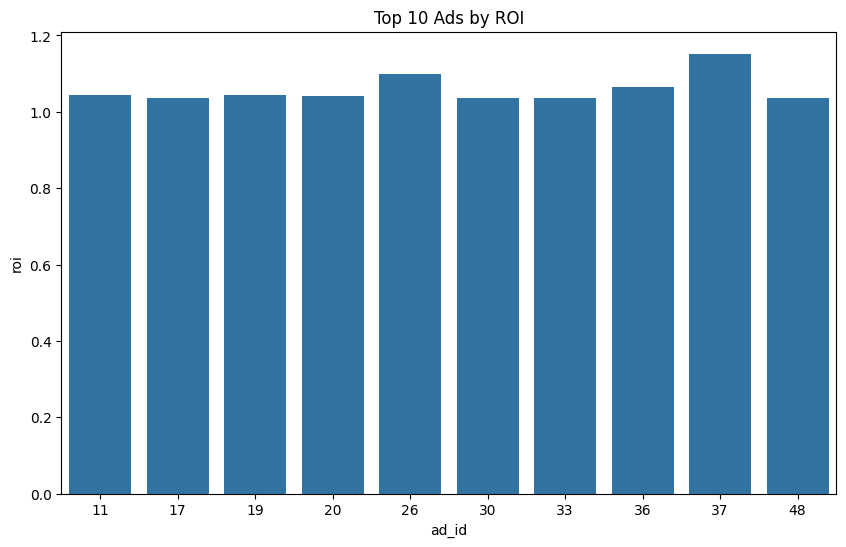

In [15]:
# Visualization – Top 10 Ads by ROI
plt.figure(figsize=(10,6))
sns.barplot(x="ad_id", y="roi", data=ad_summary.sort_values("roi", ascending=False).head(10))
plt.title("Top 10 Ads by ROI")
plt.show()

In [16]:
# Keyword-level summary
keyword_summary = fact_df.groupby("keyword_id").agg({
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum",
    "cost": "sum",
    "revenue": "sum"
}).reset_index()

keyword_summary["ctr"] = keyword_summary["clicks"] / keyword_summary["impressions"]
keyword_summary["cvr"] = keyword_summary["conversions"] / keyword_summary["clicks"]
keyword_summary["roi"] = (keyword_summary["revenue"] - keyword_summary["cost"]) / keyword_summary["cost"]

print("\n--- Top Keywords by ROI ---")
print(keyword_summary.sort_values("roi", ascending=False).head(10))


--- Top Keywords by ROI ---
    keyword_id  impressions     clicks  conversions       cost     revenue  \
21          22    3975614.0  1416537.0     361958.0  395044.84  837850.595   
6            7    4087070.0  1429657.0     365361.0  402812.23  832277.125   
20          21    4259404.0  1452620.0     369294.0  413944.99  845354.055   
28          29    4018950.0  1433740.0     357245.0  409101.37  835281.005   
14          15    3977133.0  1388922.0     354514.0  393338.92  798906.395   
1            2    4153513.0  1485289.0     369539.0  405784.49  818825.410   
5            6    4040856.0  1409614.0     372251.0  417940.94  843010.470   
13          14    4135906.0  1457802.0     371115.0  412453.07  831604.410   
26          27    4113164.0  1409437.0     358979.0  404776.84  814163.160   
7            8    4296926.0  1471333.0     380963.0  422318.15  848653.040   

         ctr       cvr       roi  
21  0.356306  0.255523  1.120900  
6   0.349800  0.255559  1.066166  
20  0.3

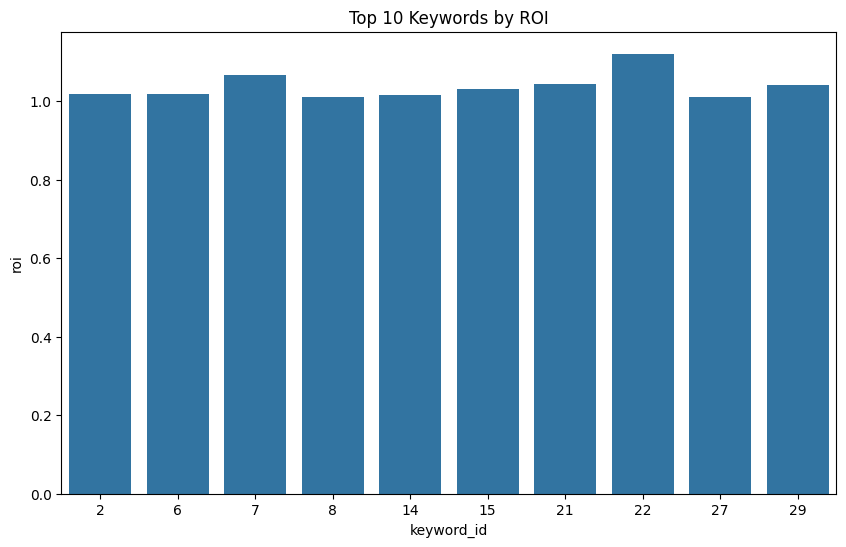

In [18]:
# Visualization – Top 10 Keywords by ROI
plt.figure(figsize=(10,6))
sns.barplot(x="keyword_id", y="roi", data=keyword_summary.sort_values("roi", ascending=False).head(10))
plt.title("Top 10 Keywords by ROI")
plt.show()

In [19]:
# Regional performance summary
region_summary = fact_df.groupby("region_id").agg({
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum",
    "cost": "sum",
    "revenue": "sum"
}).reset_index()

region_summary["ctr"] = region_summary["clicks"] / region_summary["impressions"]
region_summary["cvr"] = region_summary["conversions"] / region_summary["clicks"]
region_summary["roi"] = (region_summary["revenue"] - region_summary["cost"]) / region_summary["cost"]

print("\n--- Regional Performance ---")
print(region_summary.sort_values("roi", ascending=False).head(10))


--- Regional Performance ---
    region_id  impressions     clicks  conversions       cost      revenue  \
14         15    8293073.0  2902168.0     744956.0  820229.38  1666883.825   
8           9    8059672.0  2862501.0     735712.0  821145.36  1659901.265   
0           1    8187592.0  2901832.0     750326.0  824708.11  1653833.530   
5           6    8590860.0  2990619.0     763861.0  860890.39  1725264.365   
1           2    8489334.0  2973357.0     758097.0  839514.10  1677432.955   
10         11    8147384.0  2852996.0     724090.0  810047.26  1618354.935   
2           3    8337391.0  2952496.0     744400.0  832708.56  1657825.000   
13         14    8556417.0  2997187.0     760637.0  843485.49  1679257.165   
6           7    8162611.0  2791848.0     712626.0  809772.78  1611307.035   
9          10    8371765.0  2962441.0     750836.0  844671.64  1675766.980   

         ctr       cvr       roi  
14  0.349951  0.256689  1.032217  
8   0.355163  0.257017  1.021446  
0   0.

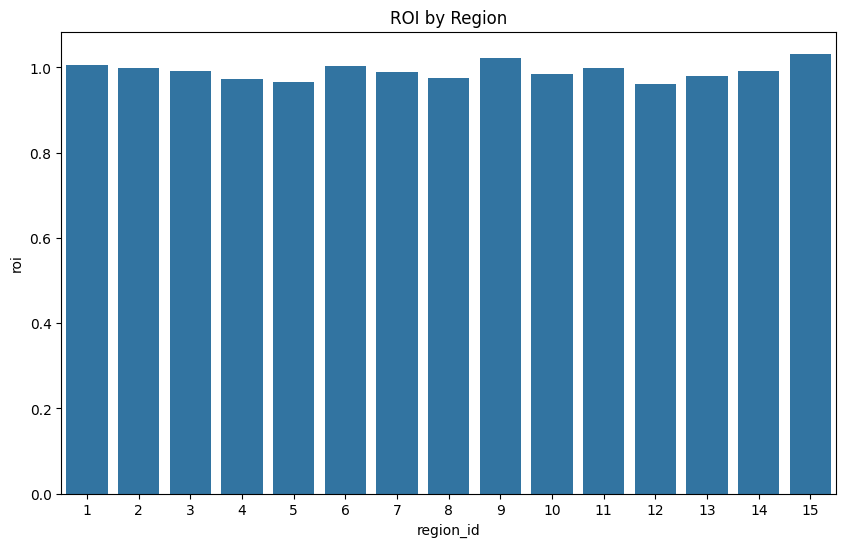

In [21]:
# Visualization – ROI by Region
plt.figure(figsize=(10,6))
sns.barplot(x="region_id", y="roi", data=region_summary.sort_values("roi", ascending=False))
plt.title("ROI by Region")
plt.show()

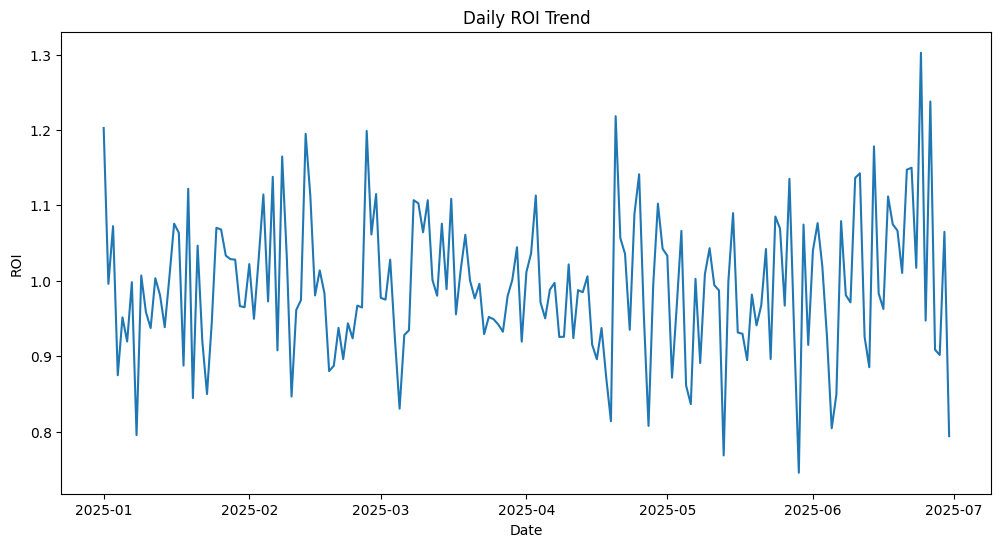

In [23]:
# Convert date column to datetime
fact_df["date"] = pd.to_datetime(fact_df["date"])

# Daily summary
daily_summary = fact_df.groupby("date").agg({
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum",
    "cost": "sum",
    "revenue": "sum"
}).reset_index()

daily_summary["ctr"] = daily_summary["clicks"] / daily_summary["impressions"]
daily_summary["cvr"] = daily_summary["conversions"] / daily_summary["clicks"]
daily_summary["roi"] = (daily_summary["revenue"] - daily_summary["cost"]) / daily_summary["cost"]

# Visualization – ROI over time
plt.figure(figsize=(12,6))
sns.lineplot(x="date", y="roi", data=daily_summary)
plt.title("Daily ROI Trend")
plt.xlabel("Date")
plt.ylabel("ROI")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4724\1434233348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Stage", data=funnel_df, palette="Blues_r")


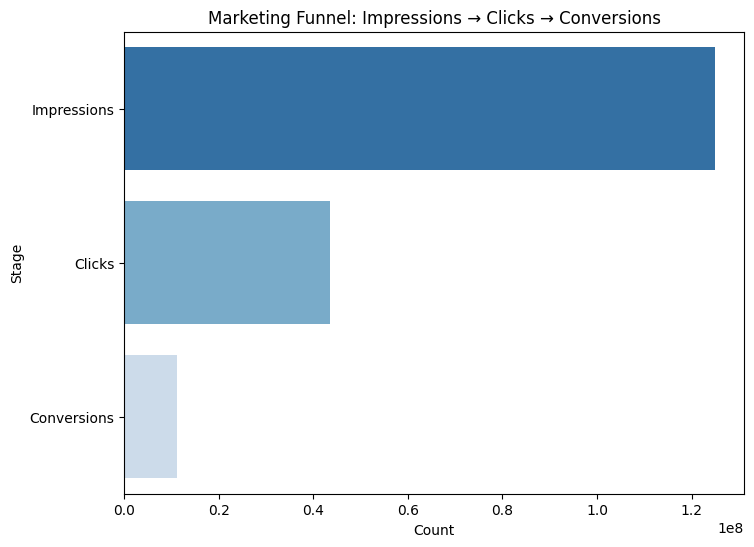


--- Funnel Conversion Rates ---
CTR: 0.3489058319848368
CVR: 0.2555556078336147


In [26]:
# Funnel ratios (impressions → clicks → conversions)
funnel = {
    "Impressions": fact_df["impressions"].sum(),
    "Clicks": fact_df["clicks"].sum(),
    "Conversions": fact_df["conversions"].sum()
}

funnel_df = pd.DataFrame(list(funnel.items()), columns=["Stage", "Count"])

# Visualization – Funnel
plt.figure(figsize=(8,6))
sns.barplot(x="Count", y="Stage", data=funnel_df, palette="Blues_r")
plt.title("Marketing Funnel: Impressions → Clicks → Conversions")
plt.show()

print("\n--- Funnel Conversion Rates ---")
print("CTR:", funnel["Clicks"] / funnel["Impressions"])
print("CVR:", funnel["Conversions"] / funnel["Clicks"])